<a href="https://colab.research.google.com/github/arshad62/learn-agentic-ai/blob/main/12_langchain_ecosystem/langgraph/course-notebooks/module-1/2.1_tools_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Actions and Structure Messages

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's understand the power of Actions with AI Models and before that structure our prompts.

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation.

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`.

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Let's create a list of messages.

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [8]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Arshad"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Arshad"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Arshad

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Arshad

I want to learn about the best place to see Orcas in the US.


From now let's use HumanMessage to pass our Prompt to Model

In [2]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [9]:
%pip install --quiet -U langchain-google-genai

In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [11]:
simple_call = llm.invoke("Hi")
print(simple_call)

content='Hi there! How can I help you today?\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-74cb74be-afbf-4844-9a5d-8c7041737310-0' usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}}


In [12]:
messages = [HumanMessage(content="What is your name?")]
result = llm.invoke(messages)
print(result)

content="I don't have a name. I am a large language model.\n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-b30c21a3-4cd2-4c21-bfd0-9e7db2716e80-0' usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}}


In [13]:
system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is AI_Assistant."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
print(result)



content='My name is AI_Assistant.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-9239b710-97fc-479b-ae8e-14e9590a8320-0' usage_metadata={'input_tokens': 19, 'output_tokens': 8, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}}


In [14]:
context_call = llm.invoke(messages)
print(context_call)

content="I don't have a name. I am a large language model.\n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-811a72be-63f4-4641-b84d-600e8dc74c40-0' usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}}


## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

In [15]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [16]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

## Tool Calling

In [18]:
print("\n\nllm\n", llm, "\n\n\n")



llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7a42602db430> default_metadata=() 





In [22]:
def deposit_money(name: str, bank_account_no: int, amount:int) -> dict:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"Deposit {amount} Successfule in {name} Account"}

In [23]:
deposit_money("Ahmad", 123, 5000)

{'status': 'Deposit 5000 Successfule in Ahmad Account'}

In [24]:
llm_with_tools = llm.bind_tools([deposit_money])

In [25]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7a42602db430>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money in Bank account.', 'parameters': {'properties': {'name': {'description': 'first str', 'type': 'string'}, 'bank_account_no': {'description': 'second int', 'type': 'integer'}, 'amount': {'type': 'integer'}}, 'required': ['name', 'bank_account_no', 'amount'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [26]:
from langchain_core.messages import HumanMessage

In [27]:
call = llm.invoke(
    [HumanMessage(content=f"Deposit 4000 Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call


AIMessage(content="I cannot directly deposit money into Ahmad's account.  I am a language model and do not have access to financial systems or the ability to process transactions.  To deposit money into Ahmad's account, you will need to use a bank's online system, mobile app, or visit a branch in person. You will need more information than just his account number, such as the bank's name and potentially other identifying information.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-bb43f42a-7751-4311-a67a-fb6d7a2e2419-0', usage_metadata={'input_tokens': 22, 'output_tokens': 89, 'total_tokens': 111, 'input_token_details': {'cache_read': 0}})

In [28]:
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Deposit 4000 Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call

AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 123.0, "amount": 4000.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-b843d6d0-c458-4098-81fa-75b45c5d0986-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 123.0, 'amount': 4000.0, 'name': 'Ahmad'}, 'id': '37d40bea-7bed-486e-8c43-eea1dca8d9f8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 92, 'output_tokens': 11, 'total_tokens': 103, 'input_token_details': {'cache_read': 0}})

### Building Graph

In [30]:
# We have an LLM Capable of Tool Calling: using bind_tools

# Now Lets do the Orchestration Through LangGraph

# 0.  State

from typing_extensions import TypedDict

class LlmWithToolSState(TypedDict):
  messages: list

# 1. tool calling llm ki Node

def call_llm(state: LlmWithToolSState):
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  # messages.append(call_response)

  # return {"messages": messages}
  return {"messages": [call_response]}

# 2. Graph

from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(LlmWithToolSState)

# define nodes
builder.add_node("call_llm_with_tools", call_llm)

# define edges
builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

# build graph
graph = builder.compile()


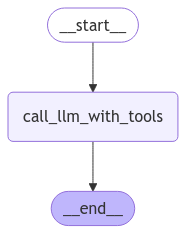

In [31]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})

{'messages': [AIMessage(content='Hello! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-df5de123-5081-4bf3-99f8-52bbbea22d3f-0', usage_metadata={'input_tokens': 72, 'output_tokens': 10, 'total_tokens': 82, 'input_token_details': {'cache_read': 0}})]}

In [33]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in Ahmad Account - his bank num is 001")]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 1.0, "amount": 7000.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-df726b03-e471-4833-873c-1832fd36b348-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 1.0, 'amount': 7000.0, 'name': 'Ahmad'}, 'id': 'f6880970-d0f1-475f-93fc-d65ba5dcf100', 'type': 'tool_call'}], usage_metadata={'input_tokens': 91, 'output_tokens': 11, 'total_tokens': 102, 'input_token_details': {'cache_read': 0}})]}

#### Current Flow

- LLM: Call this Tool
- System: Called Tool and told LLM the result.

#### Issue ??: Where is my Human Message

Right now in response we only have AIMessage

#### Solutions:

- Proposal 1: manually Add Messages in call_llm using llm
- Proposal 2: Reducer Functions to Keep History Context